## Part 1 ‑ Exploratory data analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15­minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
##  Read the json file into a Dataframe for analysis purposes

df = pd.read_json('C:/Users/chadc/Downloads/DATA SCIENCE MAIN COURSE/Datasets/ultimate_challenge/logins.json')

In [3]:
##  Print the DataFrame to inspect the file

df

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
...,...
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38


In [4]:
## Call the info method to see the information about the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [5]:
##  Call the dtypes method to see what format the entries in the dataframe are

df.dtypes

login_time    datetime64[ns]
dtype: object

In [6]:
##  Set the index to the 'login_time' so the DataFrame is in a more manageable form for data analysis

df.set_index('login_time', inplace=True)

In [7]:
##  Check to make sure that the index is in the datetime format 

df

""
login_time
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:37
1970-01-01 20:16:36
1970-01-01 20:26:21
...
1970-04-13 18:50:19
1970-04-13 18:43:56
1970-04-13 18:54:02


In [8]:
## Add a column to be able to count the number of occurrences in 15 minute intervals

df['Total'] = 1

In [9]:
##  Check to see the DataFrame with the added column

df

,Total
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1
...,...
1970-04-13 18:50:19,1
1970-04-13 18:43:56,1
1970-04-13 18:54:02,1


In [10]:
## Resample the dataframe into 15 minute intervals with a runny tally of logins per 15 minute intervals

df_15 = df.resample('15T').sum()

In [11]:
## Check the dataframe to see the accuracy of the resample

df_15

,Total
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


Text(0.5, 1.0, 'Logins in 15 Minute Intervals')

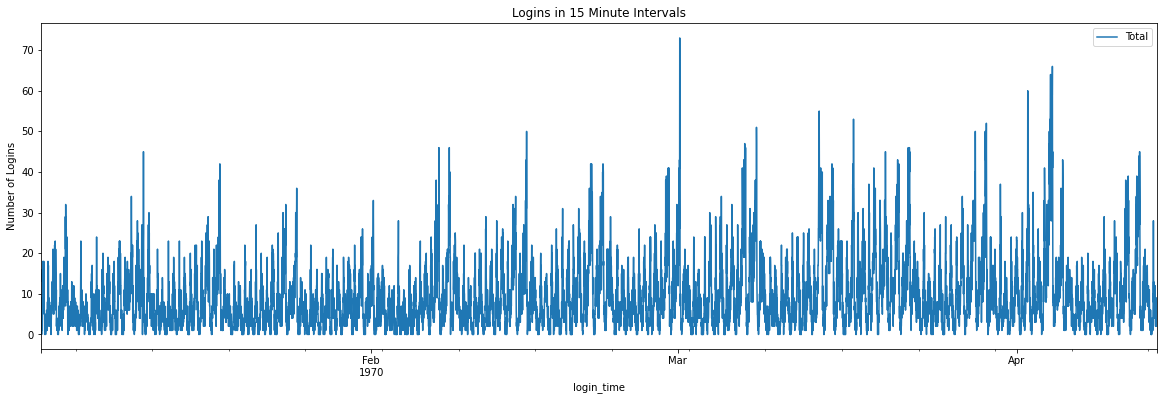

In [28]:
## Plot the frequency of the logins per 15 minute intervals

df_15.plot(figsize=(20,6))
plt.ylabel ('Number of Logins')
plt.title('Logins in 15 Minute Intervals')
    
    # STrong Seasonality

Text(0.5, 1.0, 'Logins in 15 Minute Intervals')

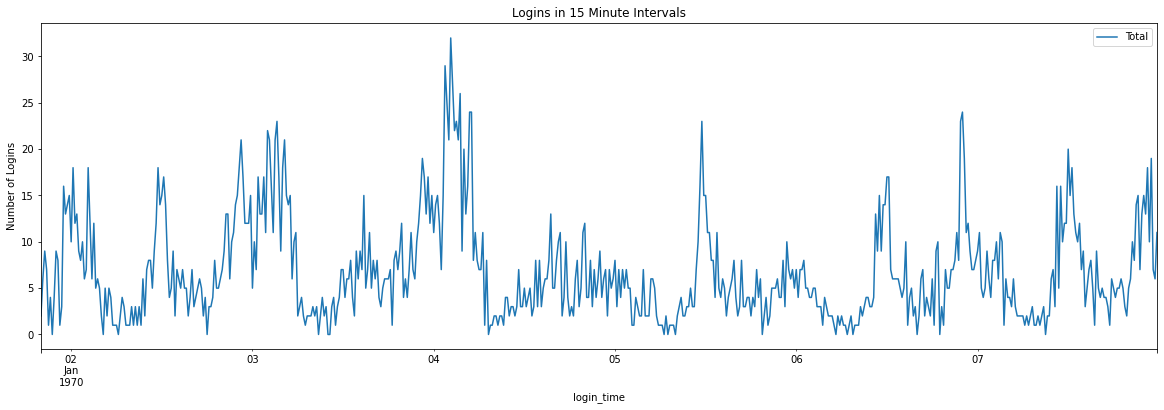

In [24]:
## Snapshot of a daily cycle for the first week of 1970.

df_15.loc['1970-01-01':'1970-01-07'].plot(figsize=(20,6))
plt.ylabel ('Number of Logins')
plt.title('Logins in 15 Minute Intervals')

Text(0.5, 1.0, 'Logins in 15 Minute Intervals')

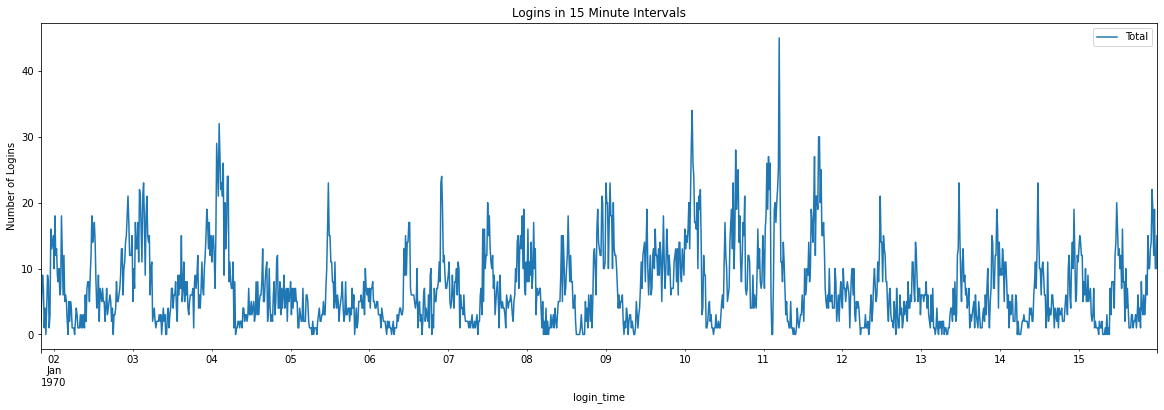

In [25]:
df_15.loc['1970-01-01':'1970-01-15'].plot(figsize=(20,6))
plt.ylabel ('Number of Logins')
plt.title('Logins in 15 Minute Intervals')

Text(0.5, 1.0, 'Logins in 15 Minute Intervals')

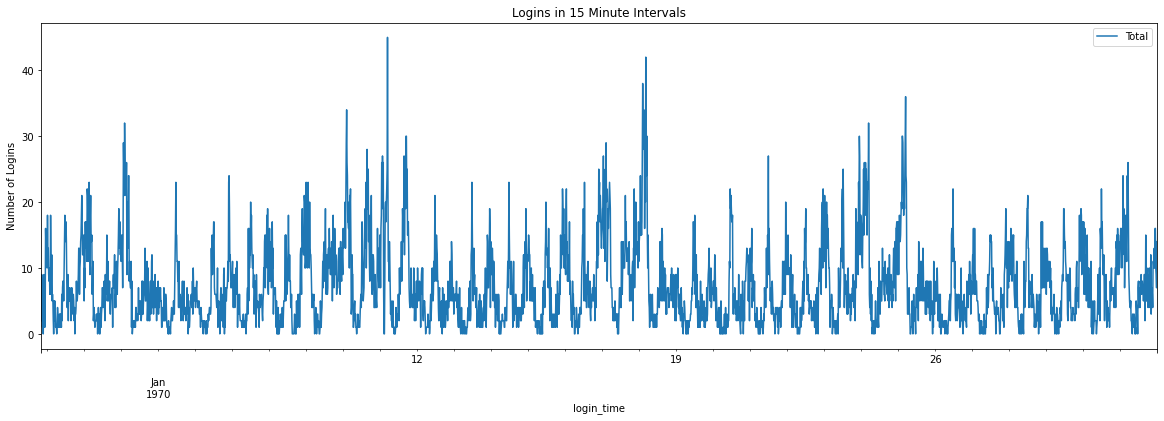

In [26]:
df_15.loc['1970-01-01':'1970-01-31'].plot(figsize=(20,6))
plt.ylabel ('Number of Logins')
plt.title('Logins in 15 Minute Intervals')

Text(0.5, 1.0, 'Logins in 15 Minute Intervals')

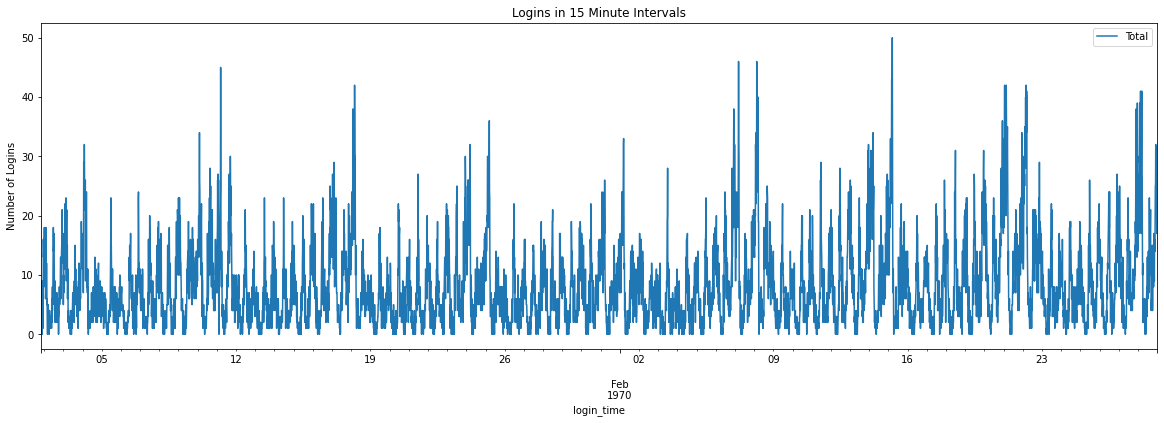

In [27]:
df_15.loc['1970-01-01':'1970-02-28'].plot(figsize=(20,6))
plt.ylabel ('Number of Logins')
plt.title('Logins in 15 Minute Intervals')

In [16]:
df_15['Weekday']=df_15.index.dayofweek

In [17]:
df_15

,Total,Weekday
login_time,,
1970-01-01 20:00:00,2,3
1970-01-01 20:15:00,6,3
1970-01-01 20:30:00,9,3
1970-01-01 20:45:00,7,3
1970-01-01 21:00:00,1,3
...,...,...
1970-04-13 17:45:00,5,0
1970-04-13 18:00:00,5,0
1970-04-13 18:15:00,2,0


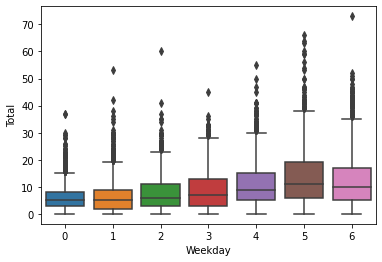

In [18]:
sns.boxplot(data=df_15, x='Weekday', y='Total')

By definition, "Seasonality is always of a fixed and known period. Hence, seasonal time series are sometimes called periodic time series. A cyclic pattern exists when data exhibit rises and falls that are not of fixed period."  https://robjhyndman.com/hyndsight/cyclicts/#:~:text=Seasonality%20is%20always%20of%20a,of%20at%20least%202%20years.

At first glance, the data seems to have a strong showing of seasonality.  However, when the data is broken down into smaller samples, it seems that the time series is cyclical in nature as the variations do not seem to follow a particular pattern.  

Upon further inspection, it seems that the majority of the logins occur towards the weekend with Saturdays having the largest number of logins.  This is perhaps because people in the workforce tend to have more free time on the weekends and are able to login more frequently during these times.  Mondays seem to have the least frequent amount of logins and as the week progresses, people seem to tend to start logging in more.  There also seem to be many outliers, but this is perhaps due to the nature of the dataset.

## Part 2 ‑ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
##### 1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

##### "Ultimate Inc. Problem Statement [Chad Warner]”

##### Problem Statement Worksheet (Hypothesis Formation) 
What opportunities exist for Ultimate Inc. to encourage driver partners to be available in both cities, by reimbursing all toll costs.

##### 1.   Context

	The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. However, a toll bridge, with a two­-way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs. 

##### 2.  Criteria for Success

	Data prior to the experiment and during the experiment are necessary in order to gain a better understanding and insight as to whether the experiment will be a success or a failure.  It is imperative that data is collected regarding the driver partners behavior.  In order to conduct the experiment, each driver partner would need to download an app with gps capabilities so their travels could be monitored.   The following criteria are metrics that could be measured to determine the success of the experiment.

Amount of time each Driver partner spends in Gotham
Amount of time each Driver partner spends in Metropolis
Number of rides each Driver partner performs in Gotham
Number of rides each Driver partner performs in Metropolis
Number of times each Driver partner crosses the bridge
Number of times each Driver partner denies a ride because of the toll (if possible to gather this data)
Length of each ride
Whether the ride is local in either Gotham or Metropolis or whether the driver has to cross the toll road
How long each customer had to wait for a ride from a local Driver partner
Revenue generated by Driver partners in both localities

	Once the data is collected, then a proper baseline could be formed.  Once the experiment is performed, then an analysis could be performed to gauge whether or not the drivers expand their radius and are more productive after the reimbursements become effective.  If the drivers are able and willing to broaden the areas they serve without the restriction of having to pay tolls out of pocket, and not be reimbursed, then that metric would determine the success or failure of the experiment.

##### 3.  Scope of Solution Space

	The total amount of reimbursements will be reviewed and analyzed, spanning a fixed period of time, in order to determine whether the toll reimbursements incentived the drivers to cross the bridge more often and expand their service areas.

##### 4.  Constraints within the Solution Space
	
The current constraints are the fact that not enough data has been gathered to determine whether there is an effect (positive or negative) of reimbursing the toll costs.  Until the data can be gathered, the experiment can neither accept or reject a null hypothesis.
	

##### 5.  Stakeholders to Provide Key Insight

Driver Partners
Ultimate Managers of City Operations

##### 6.  What Key Data Sources are Required

The potential data mentioned above

##### 2.   Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on: a. how you will implement the experiment b. what statistical test(s) you will conduct to verify the significance of the observation c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.
 
I would group the drivers into two separate groups selected at random.  One group will be assessed a toll at the toll booth.  The other group would not be assessed a toll at the toll booth.  The toll booth will serve at the treatment.  Based on the two groups created, I would form a null hypothesis.  The null hypothesis would be that the toll charge affects whether or not the Partner Driver cross the bridge.  In order for the experiment to be a success, the null hypothesis would have to be accepted.  A good indicator of success would be to analyze the p-value to the null hypothesis.   The p-value will only indicate whether or not the null hypothesis is supported but if its rejected, it cannot determine the validity of the alternative hypothesis.  Also since two groups are being compared against each other, a two sample t-test is a great way to compare the two.  In practice, a two-sample t-test can be used when the data values are independent, are randomly sampled from two normal populations, and the two independent groups have equal variances.


## Part 3 ‑ Predictive modeling

##### Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days. We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate. The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

##### 1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

##### 2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model?  Include any key indicators of model performance.

##### 3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long­term rider retention (again, a few sentences will suffice).

In [2]:
# Read the json file in for inspection

challenge = pd.read_json('C:/Users/chadc/Downloads/DATA SCIENCE MAIN COURSE/Datasets/ultimate_challenge/ultimate_data_challenge.json')

In [3]:
# Check to make sure that the file has been read in and inspect the first 5 lines

challenge.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [4]:
# Call the describe function to inspect the distributions

challenge.describe().round(decimals=3)

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000,41878.000,50000.000,50000.000,50000.000,50000.000,49799.000
mean,2.278,4.602,1.075,8.850,60.926,5.797,4.778
std,3.793,0.617,0.222,19.959,37.082,5.707,0.447
min,0.000,1.000,1.000,0.000,0.000,0.000,1.000
25%,0.000,4.300,1.000,0.000,33.300,2.420,4.700
50%,1.000,4.900,1.000,0.000,66.700,3.880,5.000
75%,3.000,5.000,1.050,8.600,100.000,6.940,5.000
max,125.000,5.000,8.000,100.000,100.000,160.960,5.000


In [5]:
#  Call the info function and see if there are missing values as well as the Dtypes of the dataset

challenge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [6]:
#  Change the datetime columns to datetime objects

challenge['signup_date'] = pd.to_datetime(challenge['signup_date'])

In [7]:
#  Change the datetime columns to datetime objects

challenge['last_trip_date'] = pd.to_datetime(challenge['last_trip_date']) 

In [8]:
# Determine that the Dtypes have been changed from "object" to "datetime64[ns]"

challenge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [9]:
# Check the columns for missing values

challenge.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

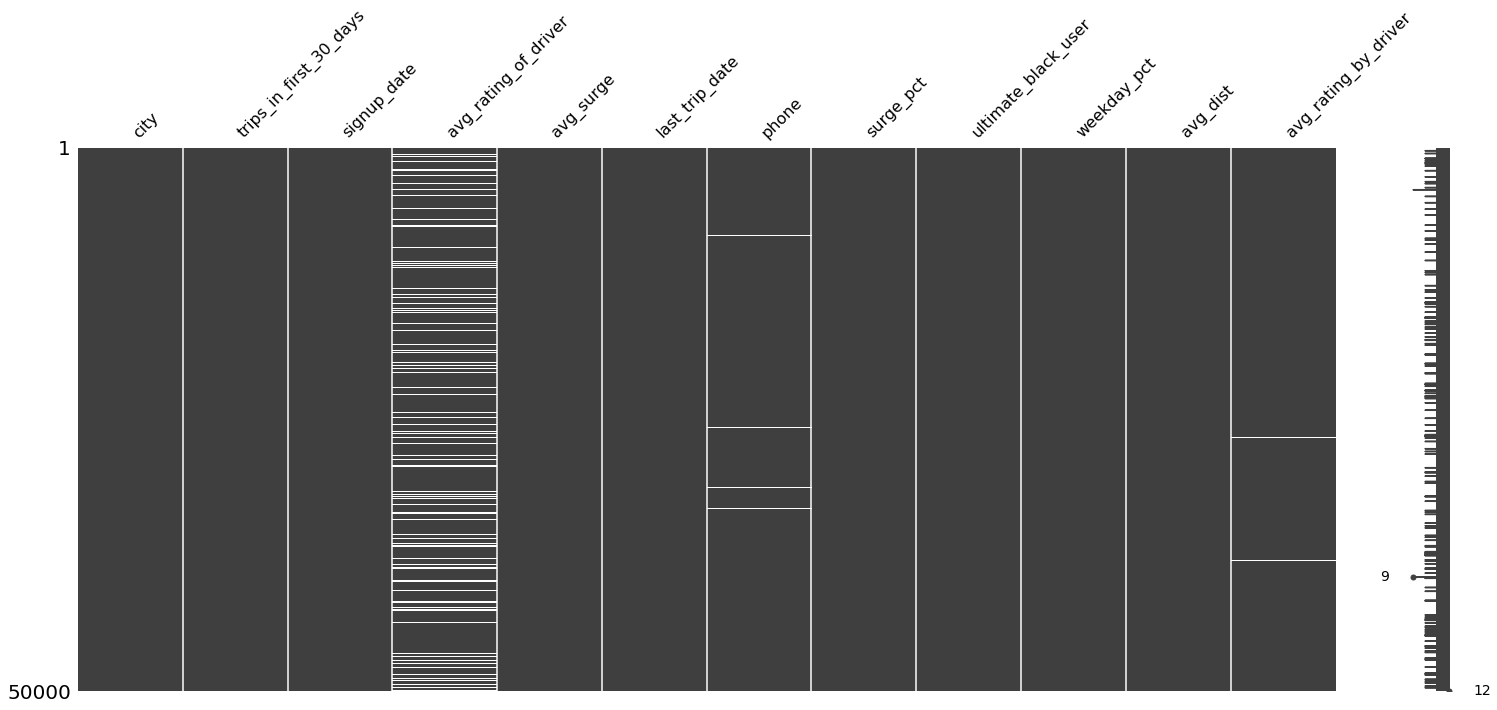

In [10]:
# Create a missingness matrix to see the distribution of the missing data

msno.matrix(challenge)

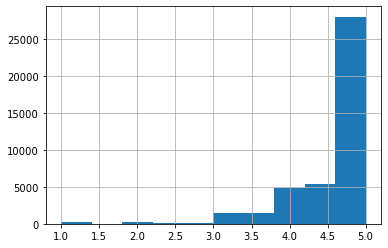

In [11]:
# Create of a visual of a histogram of the rating of the drivers by customers

challenge['avg_rating_of_driver'].hist()
plt.show()

In [12]:
#  Impute the missing values with the median of the column's values

challenge['avg_rating_of_driver'].fillna(challenge['avg_rating_of_driver'].median(), inplace=True)

In [13]:
#  Check the remaining missing values and make sure the missing values for the 
# 'avg rating of driver' column have been minimized

challenge.isna().sum()

city                        0
trips_in_first_30_days      0
signup_date                 0
avg_rating_of_driver        0
avg_surge                   0
last_trip_date              0
phone                     396
surge_pct                   0
ultimate_black_user         0
weekday_pct                 0
avg_dist                    0
avg_rating_by_driver      201
dtype: int64

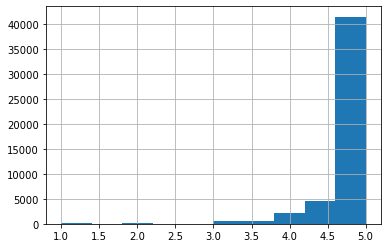

In [14]:
# Create of a visual of a histogram of the rating of the drivers by driver

challenge['avg_rating_by_driver'].hist()
plt.show()

In [15]:
#  Impute the missing values with the median of the column's values

challenge['avg_rating_by_driver'].fillna(challenge['avg_rating_by_driver'].median(), inplace=True)

In [16]:
#  Check the remaining missing values and make sure the missing values for the 
# 'avg rating by driver' column have been minimized

challenge.isna().sum()

city                        0
trips_in_first_30_days      0
signup_date                 0
avg_rating_of_driver        0
avg_surge                   0
last_trip_date              0
phone                     396
surge_pct                   0
ultimate_black_user         0
weekday_pct                 0
avg_dist                    0
avg_rating_by_driver        0
dtype: int64

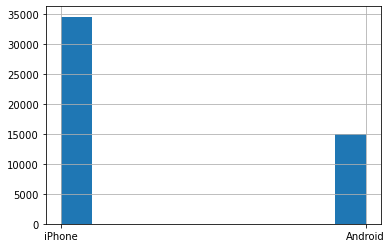

In [17]:
# Create of a visual of a histogram of the phones used by the customers

challenge['phone'].hist()
plt.show()

In [18]:
# Impute the missing values of this column with the mode or the most common phone

challenge['phone'].fillna('iPhone', inplace=True)

In [19]:
# Check the value counts of the phone column

challenge['phone'].value_counts()

iPhone     34978
Android    15022
Name: phone, dtype: int64

###### It seems like there are just about twice as many iPhone users as there are Android users.  Iphone users seem to account for about 2/3 of the total amount of cell phone users.

In [20]:
#  Check the missing values for any remaining missing values

challenge.isna().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

In [21]:
#  Create a new column called 'Retained' which accounts for those users who have made a trip
# Within the last 30 days 

challenge['Retained'] = challenge['last_trip_date'] > '2014-06-01'

In [22]:
challenge

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,Retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,True
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2,True
49996,Astapor,1,2014-01-24,4.9,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0,False
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0,False
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5,False


In [23]:
# Ascertain the value counts of the newly created column 'Retained'

challenge['Retained'].value_counts()

False    31690
True     18310
Name: Retained, dtype: int64

In [24]:
#  Change the format of the 'Retained' column from Boolean to Binary

challenge['Retained'] = challenge['Retained'].astype(int)
challenge.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,Retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [25]:
#  Find the amount of the retained values that equal "True" or "1"

numerator = len(challenge[challenge.Retained == True])

In [26]:
# Find the total amount of the samples

denominator = len(challenge)

In [27]:
# Find the percentage of the amount of people retained in relation to the entire amount 

per_retained = numerator/denominator
per_retained

0.3662

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028DDAD3BD00>]],
      dtype=object)

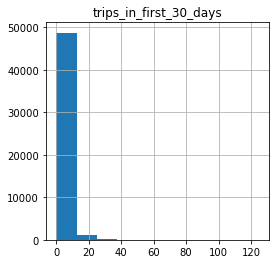

In [28]:
# Create a histogram for 'trips in first 30 days'

challenge.hist('trips_in_first_30_days', figsize=(4,4))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028DDA3154C0>]],
      dtype=object)

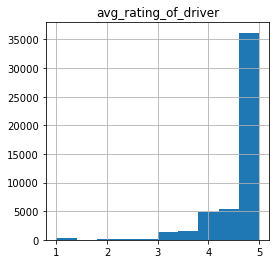

In [29]:
# Create a histogram for the 'avg rating of driver'

challenge.hist('avg_rating_of_driver', figsize=(4,4))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028DDAC53610>]],
      dtype=object)

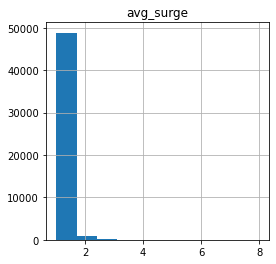

In [30]:
# Create a histogram of the 'avg_surge' column

challenge.hist('avg_surge', figsize=(4,4))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028DDAA8E070>]],
      dtype=object)

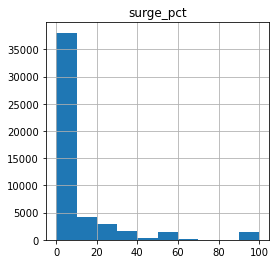

In [31]:
# Create a histogram of the 'surge_pct' column of the dataframe

challenge.hist('surge_pct', figsize=(4,4))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028DDA949670>]],
      dtype=object)

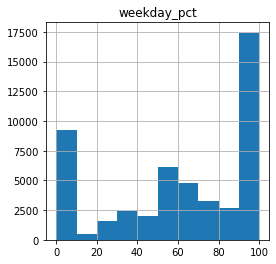

In [32]:
# Create a histogram of the 'weekday_pct'column of the dataframe

challenge.hist('weekday_pct', figsize=(4,4))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028DDA436DC0>]],
      dtype=object)

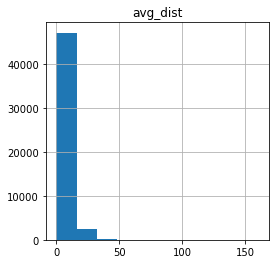

In [33]:
# Create a histogram of the 'avg_dist'column of the dataframe

challenge.hist('avg_dist', figsize=(4,4))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028DDA574100>]],
      dtype=object)

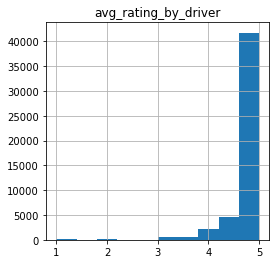

In [34]:
# Create a histogram of the 'avg_rating_by_driver'column of the dataframe

challenge.hist('avg_rating_by_driver', figsize=(4,4))

In [35]:
categories = challenge[['city', 'phone']]

In [36]:
categories

,city,phone
0,King's Landing,iPhone
1,Astapor,Android
2,Astapor,iPhone
3,King's Landing,iPhone
4,Winterfell,Android
...,...,...
49995,King's Landing,iPhone
49996,Astapor,iPhone
49997,Winterfell,Android
49998,Astapor,iPhone


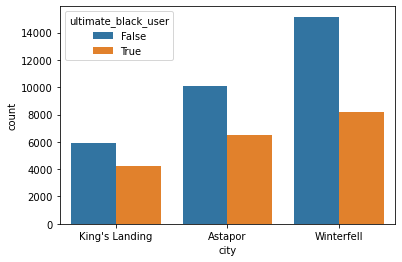

In [37]:
# Determine if the user is a 'ultimate black user' and group by city

sns.countplot(x= 'city', hue = 'ultimate_black_user', data=challenge)

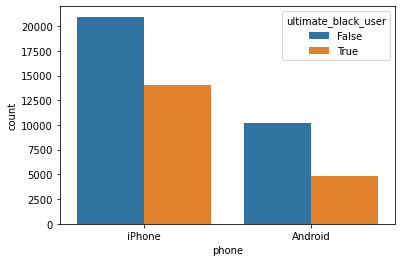

In [38]:
#  Determine whether or not the user is a 'ultimate black user' and group by type of Phone

sns.countplot(x= 'phone', hue = 'ultimate_black_user', data=challenge)

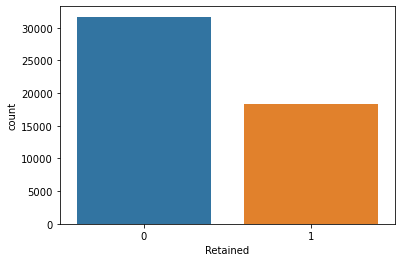

In [39]:
# Create a visualization of the retained users and the users that were not retained

sns.countplot(challenge['Retained'])

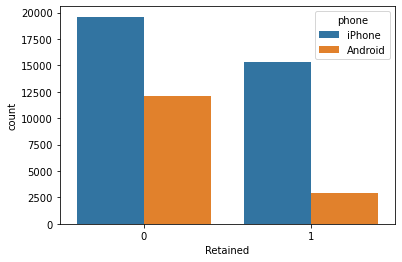

In [40]:
#  Determine the retained users and the users not retained and separate by phone

sns.countplot(x='Retained', hue='phone', data=challenge)

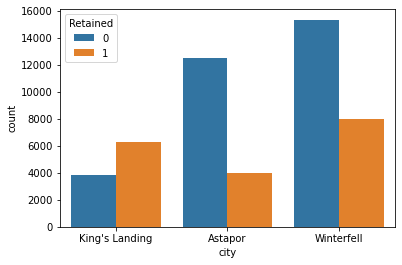

In [41]:
# Separate the users who were retained and who were not retained and separate by city

sns.countplot(x= 'city', hue = 'Retained', data=challenge)

In [42]:
# See the proportion of 'ultimate black users' to non 'ultimate black users'

challenge['ultimate_black_user'].value_counts(normalize=True)

False    0.62292
True     0.37708
Name: ultimate_black_user, dtype: float64

In [43]:
challenge['city'].value_counts(normalize=True)

Winterfell        0.46672
Astapor           0.33068
King's Landing    0.20260
Name: city, dtype: float64

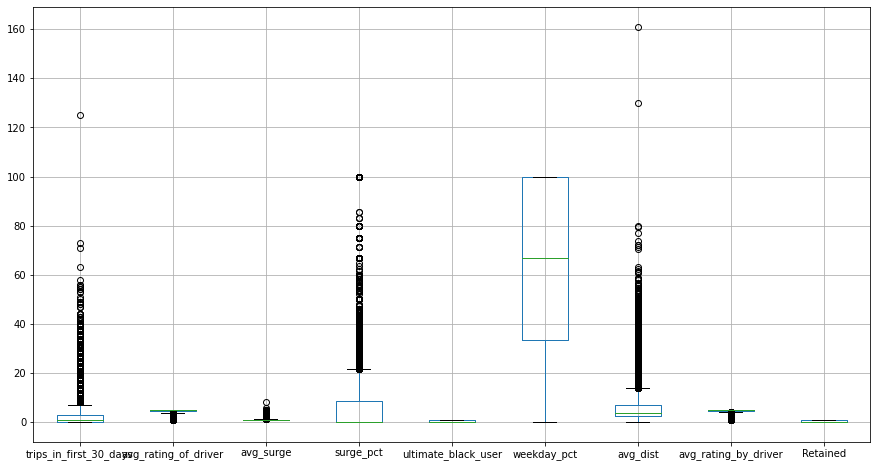

In [44]:
challenge.boxplot(figsize=(15, 8))

Text(0.5, 1.0, 'Correlation ')

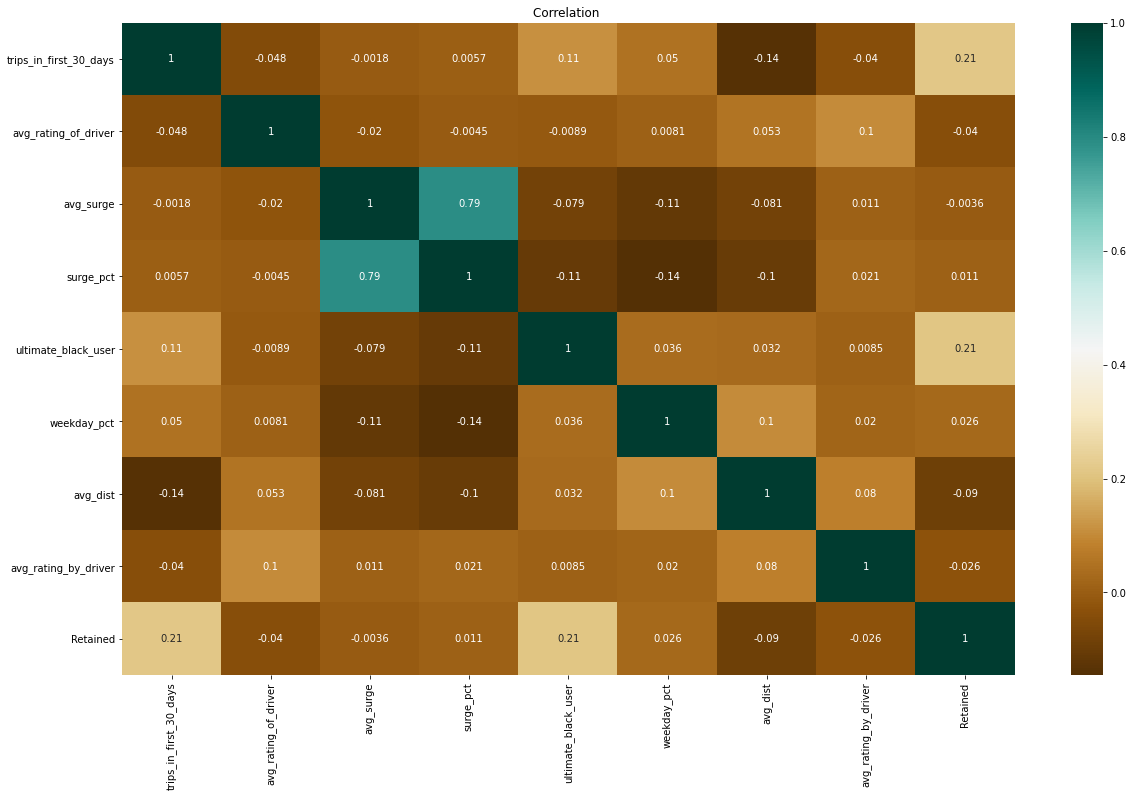

In [45]:
corr=challenge.corr()
fig = plt.figure(figsize=(20,12))
r = sns.heatmap(corr, cmap='BrBG', annot=True)
r.set_title("Correlation ")

In [46]:
corr

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,Retained
trips_in_first_30_days,1.000000,-0.048272,-0.001841,0.005720,0.112210,0.050388,-0.136329,-0.039988,0.214728
avg_rating_of_driver,-0.048272,1.000000,-0.019948,-0.004502,-0.008891,0.008095,0.053208,0.101203,-0.040165
avg_surge,-0.001841,-0.019948,1.000000,0.793582,-0.078791,-0.110071,-0.081491,0.011311,-0.003567
surge_pct,0.005720,-0.004502,0.793582,1.000000,-0.106861,-0.144918,-0.104414,0.020646,0.010612
ultimate_black_user,0.112210,-0.008891,-0.078791,-0.106861,1.000000,0.035998,0.032310,0.008466,0.210259
weekday_pct,0.050388,0.008095,-0.110071,-0.144918,0.035998,1.000000,0.101652,0.019941,0.026413
avg_dist,-0.136329,0.053208,-0.081491,-0.104414,0.032310,0.101652,1.000000,0.079883,-0.090279
avg_rating_by_driver,-0.039988,0.101203,0.011311,0.020646,0.008466,0.019941,0.079883,1.000000,-0.026400
Retained,0.214728,-0.040165,-0.003567,0.010612,0.210259,0.026413,-0.090279,-0.026400,1.000000


In [50]:
#  Get dummies for the 3 remaining object columns

challenge_dummies = pd.get_dummies(challenge, columns = ['city', 'phone', 'ultimate_black_user'])
challenge_dummies

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,Retained,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,46.2,3.67,5.0,1,0,1,0,0,1,0,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,50.0,8.26,5.0,0,1,0,0,1,0,1,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,100.0,0.77,5.0,0,1,0,0,0,1,1,0
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,80.0,2.36,4.9,1,0,1,0,0,1,0,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,82.4,3.13,4.9,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,2014-01-25,5.0,1.00,2014-06-05,0.0,100.0,5.63,4.2,1,0,1,0,0,1,1,0
49996,1,2014-01-24,4.9,1.00,2014-01-25,0.0,0.0,0.00,4.0,0,1,0,0,0,1,1,0
49997,0,2014-01-31,5.0,1.00,2014-05-22,0.0,100.0,3.86,5.0,0,0,0,1,1,0,0,1
49998,2,2014-01-14,3.0,1.00,2014-01-15,0.0,100.0,4.58,3.5,0,1,0,0,0,1,1,0


In [51]:
# Drop the datetime objects

challenge_dummies.drop(['signup_date'], axis=1, inplace=True)

In [52]:
# Drop the datetime objects

challenge_dummies.drop(['last_trip_date'], axis=1, inplace=True)

In [53]:
# Isolate the features in order to fashion a model

challenge_dummies.columns

Index(['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver',
       'Retained', 'city_Astapor', 'city_King's Landing', 'city_Winterfell',
       'phone_Android', 'phone_iPhone', 'ultimate_black_user_False',
       'ultimate_black_user_True'],
      dtype='object')

In [54]:
challenge_dummies.rename(columns={"city_King's Landing": "city_King"}, inplace=True)

In [55]:
challenge_dummies.columns

Index(['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver',
       'Retained', 'city_Astapor', 'city_King', 'city_Winterfell',
       'phone_Android', 'phone_iPhone', 'ultimate_black_user_False',
       'ultimate_black_user_True'],
      dtype='object')

In [56]:
# Group the features together to isolate the independent variables

features = ['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver',
       'city_Astapor', 'city_King', 'city_Winterfell',
       'phone_Android', 'phone_iPhone', 'ultimate_black_user_False',
       'ultimate_black_user_True']

In [57]:
# Convert the 'Retained' column of (dummies) to binary

challenge_dummies['Retained'] = challenge_dummies['Retained'].astype(int)
challenge_dummies.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,Retained,city_Astapor,city_King,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,4,4.7,1.10,15.4,46.2,3.67,5.0,1,0,1,0,0,1,0,1
1,0,5.0,1.00,0.0,50.0,8.26,5.0,0,1,0,0,1,0,1,0
2,3,4.3,1.00,0.0,100.0,0.77,5.0,0,1,0,0,0,1,1,0
3,9,4.6,1.14,20.0,80.0,2.36,4.9,1,0,1,0,0,1,0,1
4,14,4.4,1.19,11.8,82.4,3.13,4.9,0,0,0,1,1,0,1,0


In [58]:
X = challenge_dummies[features]
y = challenge_dummies['Retained']

In [59]:
#  Using a scaler because of the vast number of outliers

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = .25, random_state = 42)

In [61]:
# instantiate the model (using the default parameters)

clf = LogisticRegression(max_iter=10000)

# Fit Logistic Regression Model to the training data
clf.fit(X_train, y_train)

# Predict the Y off of the test set
y_pred = clf.predict(X_test)

# Check the accuracy
accuracy = accuracy_score(y_test, y_pred)

In [62]:
# Check the accuracy score 

accuracy

0.72232

In [63]:
# Initiate the confusion matrix

confusion_matrix(y_test, clf.predict(X_test))

array([[6739, 1185],
       [2286, 2290]], dtype=int64)

In [72]:
# Create a classification report

report_baseline = classification_report(y_test, clf.predict(X_test))
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80      7924
           1       0.66      0.50      0.57      4576

    accuracy                           0.72     12500
   macro avg       0.70      0.68      0.68     12500
weighted avg       0.71      0.72      0.71     12500



The classification report provides some insight into the classification model.  The precision and recall score are relatively high.  The model seems to have performed well predicting the users that were not retained (illustrated by a '0').  It seems to be only correct at predicting the amount of users that were retained about 50% of the time.  There may be a reason for this.  This is perhaps because the data obtained contained more data regarding passengers who were not retained.  So the model was trained to identify this better than it was trained to identify passengers who were retained.

I think that it is possible that some other models such as XGBoost, or Gradient Descent, or Random Forest, or KNN models could have possibly performed better.  However, with Logistic Regression, it does not really have any critical hyperparameters to tune.  So this is a drawback of this model.  

In [65]:
clf.coef_

array([[ 0.47171607, -0.07268314, -0.04429947,  0.09870579,  0.03961225,
        -0.20226414, -0.06529001, -0.31595932,  0.44617295, -0.06151193,
        -0.26088193,  0.26088193, -0.22042355,  0.22042355]])

In [70]:
vals = clf.coef_

In [66]:
challenge_dummies.columns

Index(['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver',
       'Retained', 'city_Astapor', 'city_King', 'city_Winterfell',
       'phone_Android', 'phone_iPhone', 'ultimate_black_user_False',
       'ultimate_black_user_True'],
      dtype='object')

In [111]:
for i, v in zip(['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver', 'city_Astapor', 'city_King', 'city_Winterfell',
       'phone_Android', 'phone_iPhone', 'ultimate_black_user_False',
       'ultimate_black_user_True'], [ 0.47171607, -0.07268314, -0.04429947,  0.09870579,  0.03961225,
       -0.20226414, -0.06529001, -0.31595932,  0.44617295, -0.06151193,
       -0.26088193,  0.26088193, -0.22042355,  0.22042355]):
    print(i, ':', v)

trips_in_first_30_days : 0.47171607
avg_rating_of_driver : -0.07268314
avg_surge : -0.04429947
surge_pct : 0.09870579
weekday_pct : 0.03961225
avg_dist : -0.20226414
avg_rating_by_driver : -0.06529001
city_Astapor : -0.31595932
city_King : 0.44617295
city_Winterfell : -0.06151193
phone_Android : -0.26088193
phone_iPhone : 0.26088193
ultimate_black_user_False : -0.22042355
ultimate_black_user_True : 0.22042355


According to the coefficients, it seems as though 'trips in the first 30 days' and the neighborhood of King's landing have the highest coefficients.  Ultimate ultimately wants to predict rider retention.  So the trips that the driver take within the first 30 days will lead to retention 6 months down the line.  Therefore, Ultimate's marketing team should focus on a promotion roll-out to entice riders to take many trips within the first 30 days.  If this occurs, then the riders have a higher chance of being retained over the course of the subsequent 6 month period.  Also, it seems that riders in the neighborhood of King's Landing tend to repeat customers.  Possibly incentivize rides with people in this neighborhood to persuade them to frequently use the service.